In [1]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

In [2]:
# helper function 

def bit_to_list(t, n):
    S = [0 for i in range(n)]    
    i = -1
    while t != 0:
        S[i] = t % 2
        t = t >> 1
        i -= 1
    return S
bit_to_list(1,4)

[0, 0, 0, 1]

### Experiment

In [3]:
# graph representation
# build up the graph with weights

graph = {
    "s": {"0": lambda x : x, "1": lambda x : 2},
    "a": {"2": lambda x : 1, "4": lambda x : x},
    "b": {"3": lambda x : 1, "5": lambda x : x},
    "c": {"6": lambda x : x},
    "d": {"7": lambda x : 1}
}

weight = graph["s"]
for i in weight.keys():
    print(i)

0
1


In [4]:
adjacency_m = [
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]
]

In [6]:
# congestion game potential

"""
input: 
# agents
state game: congestion game
env

output:
<phi, next state>
"""

"""
every state 对应一个 congestion game
"""

def phi_generator(n, state):
    phi = dict()
    s_next_n = n + 1   # agents unlabelled 
    weight = 
#     weight = env[state] 
    for i in range(s_next_n): # 0, 1 ,2
        part1, part2 = 0, 0
        m, v = 0, 0
        for m in range(i):
            part1 += weight["0"](m+1) 
        for v in range(n-i):
            part2 += weight["1"](n+1)
        phi[i] = part1 + part2
    return phi

SyntaxError: invalid syntax (<ipython-input-6-60f40d68dba2>, line 20)

In [66]:
phi_generator(2)

{0: 4, 1: 3, 2: 3}

## Experiment 1

In [7]:
# 2 agents; small
# payoff matrix

nS = 8
nA = 3

payoff = [
    [-3, -3, -4], # [s,s]
    [-2, -2, -3], # [a,a]
    [-2, -2, -2], # [a,b]
    [-2, -2, -3], # [b,b]
    [-3, -10, -10], # [c,c]
    [-10, -2, -10], # [c,d]
    [-10, -10, -2],  # [d,d]
    [0, 0, 0]     # [T,T]
]
transition =[
    [1, 2, 3],
    [4, 5, 6],
    [4, 5, 6],
    [4, 5, 6],
    [7, 7, 7],
    [7, 7, 7],
    [7, 7, 7],
    [7, 7, 7]
]

In [8]:
# 2 agents; big
# payoff matrix

nS = 11
nA = 3

payoff = [
    [-3, -3, -4], # [s,s] 1
    [-2, -2, -3], # [a,a] 2
    [-2, -2, -2], # [a,d] 3
    [-2, -2, -3], # [d,d] 4
    [-3, -3, -4], # [b,b] 5
    [-2, -2, -2], # [b,e] 6
    [-2, -2, -2],  # [e,e] 7
    [-3, -10, -10], # [c,c] 8
    [-10, -2, -10], # [c,f] 9
    [-10, -10, -2], # [f,f] 10
    [0, 0, 0]      #[T,T] 11
]
transition =[
    [1, 2, 3],
    [4, 5, 6],
    [4, 5, 6],
    [4, 5, 6],
    [7, 8, 9],
    [7, 8, 9],
    [7, 8, 9],
    [10,10,10],
    [10, 10, 10],
    [10, 10, 10],
    [10, 10, 10]
]

In [9]:
P = dict()
for s in range(nS):
    P[s] = {a : [] for a in range(nA)}
    
for state in range(nS):
    for a in range(nA):
        tmp = []
        prob = 1
        snext = transition[state][a]
        reward = payoff[state][a]
        done = False
        if snext == 10:
            done = True
        # prob, next_state, reward, done
        tmp.extend([(prob, snext, reward, done)])
        P[state][a] = tmp
P

{0: {0: [(1, 1, -3, False)], 1: [(1, 2, -3, False)], 2: [(1, 3, -4, False)]},
 1: {0: [(1, 4, -2, False)], 1: [(1, 5, -2, False)], 2: [(1, 6, -3, False)]},
 2: {0: [(1, 4, -2, False)], 1: [(1, 5, -2, False)], 2: [(1, 6, -2, False)]},
 3: {0: [(1, 4, -2, False)], 1: [(1, 5, -2, False)], 2: [(1, 6, -3, False)]},
 4: {0: [(1, 7, -3, False)], 1: [(1, 8, -3, False)], 2: [(1, 9, -4, False)]},
 5: {0: [(1, 7, -2, False)], 1: [(1, 8, -2, False)], 2: [(1, 9, -2, False)]},
 6: {0: [(1, 7, -2, False)], 1: [(1, 8, -2, False)], 2: [(1, 9, -2, False)]},
 7: {0: [(1, 10, -3, True)], 1: [(1, 10, -10, True)], 2: [(1, 10, -10, True)]},
 8: {0: [(1, 10, -10, True)], 1: [(1, 10, -2, True)], 2: [(1, 10, -10, True)]},
 9: {0: [(1, 10, -10, True)], 1: [(1, 10, -10, True)], 2: [(1, 10, -2, True)]},
 10: {0: [(1, 10, 0, True)], 1: [(1, 10, 0, True)], 2: [(1, 10, 0, True)]}}

In [11]:
def value_iteration(theta=0.0001, discount_factor=1.0):
    policy_list = []

    def one_step_lookahead(state, V):
        A = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A

    V = np.zeros(nS)
    iter = 0
    dl = []
    vl = []

    for _ in range(10):
        iter += 1
        print(iter)
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10.
            V[s] = best_action_value

        vl.append(V.copy())
        dl.append(delta)

        # Check if we can stop
        print("debug-> iter={}, delta={:.5f}, V={}".format(iter, delta, V))
#         if delta < theta:
#             break
        # Create a deterministic policy using the optimal value function
        policy_iter = np.zeros([nS, nA])
        for s in range(nS):
            # One step lookahead to find the best action for this state
            A = one_step_lookahead(s, V)
            # pdb.set_trace()
            policy_t = A
            best_action = np.argmax(A)
            # Always take the best action
            # policy_iter[s, best_action] = 1.0
            # soft policy
            policy_iter[s, :] = policy_t # record action values
        policy_list.append(policy_iter)
        # print("policy", policy_iter)

    # Create a deterministic policy using the optimal value function
    policy = np.zeros([nS, nA])
    for s in range(nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0

    return policy, V, dl, vl, policy_list

In [12]:
policy, V, dl, vl, policy_list = value_iteration()

1
debug-> iter=1, delta=3.00000, V=[-3. -2. -2. -2. -3. -2. -2. -3. -2. -2.  0.]
2
debug-> iter=2, delta=2.00000, V=[-5. -4. -4. -4. -5. -4. -4. -3. -2. -2.  0.]
3
debug-> iter=3, delta=2.00000, V=[-7. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
4
debug-> iter=4, delta=2.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
5
debug-> iter=5, delta=0.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
6
debug-> iter=6, delta=0.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
7
debug-> iter=7, delta=0.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
8
debug-> iter=8, delta=0.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
9
debug-> iter=9, delta=0.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
10
debug-> iter=10, delta=0.00000, V=[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]


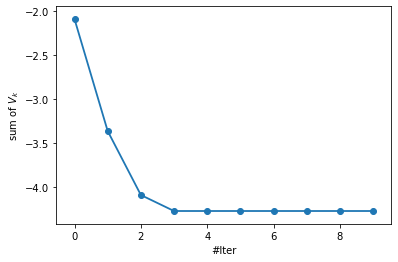

In [13]:
###### plot

v1 = np.array(vl)
x = np.arange(0, 10)
mean_v = np.mean(v1,axis=1) # sum列；得到维度与行维度相同
plt.plot(x, mean_v, linewidth=1.8)
plt.scatter(x, mean_v)
plt.xlabel('#Iter')
plt.ylabel('sum of $V_k$')
plt.show()

In [14]:
# optimal policy
# ！！！ 有几个NE
policy

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [15]:
def value_estimate(R, policy, theta=0.0001, discount_factor=1.0):
#     def one_step_lookahead(state, V):
#         A = np.zeros(nA)
#         for a in range(nA):
#             for prob, next_state, reward, done in P[state][a]:
#                 A[a] += prob * (discount_factor * R[s][a]) * policy[s][a]
#         return A
    def one_step_lookahead(state, V):
        A = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
    V = np.zeros(nS)
    iter = 0
    dl = []
    vl = []
    while True:
        iter += 1
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10.
            V[s] = np.max(A)
        print(V)
        vl.append(V.copy())
        dl.append(delta)
        # Check if we can stop
        if delta < theta:
            break
    return policy, V, dl, vl

# ？？？


In [16]:
def total_return(policy_list):
    # total return for agent 1
    print("--> Start doing total return")
    v1 = []
    v2 = []
    iter = len(policy_list)

    for idx in range(iter):
        policy = policy_list[idx]
        _, v, _, vl = value_estimate(env, R1, policy)
        v1.append(v.copy())
        _, v, _, vl = value_estimate(env, R2, policy)
        v2.append(v.copy())

    v1 = np.array(v1)
    v2 = np.array(v2)
    x = np.arange(0, iter)
    mean_v = v1.sum(-1)
    plt.plot(x, mean_v, linewidth=1.8)
    plt.scatter(x, mean_v)
    plt.xlabel('#Iter')
    plt.ylabel('$V_k$ for agent 1')
    plt.show()


    plt.plot(x[1:-1], np.diff(mean_v)[1:], linewidth=1.8)
    plt.scatter(x[1:-1], np.diff(mean_v)[1:])
    plt.xlabel('#Iter')
    plt.ylabel('$|V_k-V_{k-1}|$ for agent 1')
    plt.show()
    # agent 2
    mean_v2 = v2.sum(-1)
    plt.plot(x, mean_v2, linewidth=1.8)
    plt.scatter(x, mean_v2)
    plt.xlabel('#Iter')
    plt.ylabel('$V_k$ for agent 2')
    plt.show()

    plt.plot(x[1:-1], np.diff(mean_v2)[1:], linewidth=1.8)
    plt.scatter(x[1:-1], np.diff(mean_v2)[1:])
    plt.xlabel('#Iter')
    plt.ylabel('$|V_k-V_{k-1}|$ for agent 1')
    plt.show()


[-3. -2. -2. -2. -3. -2. -2. -3. -2. -2.  0.]
[-5. -4. -4. -4. -5. -4. -4. -3. -2. -2.  0.]
[-7. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-3. -2. -2. -2. -3. -2. -2. -3. -2. -2.  0.]
[-5. -4. -4. -4. -5. -4. -4. -3. -2. -2.  0.]
[-7. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-3. -2. -2. -2. -3. -2. -2. -3. -2. -2.  0.]
[-5. -4. -4. -4. -5. -4. -4. -3. -2. -2.  0.]
[-7. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-3. -2. -2. -2. -3. -2. -2. -3. -2. -2.  0.]
[-5. -4. -4. -4. -5. -4. -4. -3. -2. -2.  0.]
[-7. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-9. -6. -6. -6. -5. -4. -4. -3. -2. -2.  0.]
[-3. -2. -2. -2. -3. -2. -2. -3. -2. -2.  0.]
[-5. -4. -4. -4. -5. -4. -4. -3. -

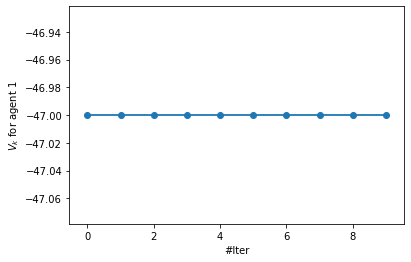

In [17]:
# total return 
iter = len(policy_list)
v1 = []
for idx in range(iter):
    policy = policy_list[idx]

    _, v, _, vl = value_estimate(payoff, policy)
    v1.append(v.copy())
#     _, v, _, vl = value_estimate(env, R2, policy)
#     v2.append(v.copy())

v1 = np.array(v1)

# v2 = np.array(v2)
x = np.arange(0, iter)
mean_v = v1.sum(-1) # sum列；得到维度与行维度相同
plt.plot(x, mean_v, linewidth=1.8)
plt.scatter(x, mean_v)
plt.xlabel('#Iter')
plt.ylabel('$V_k$ for agent 1')
plt.show()


## 4 agents planning

In [18]:
# graph representation
# build up the graph with weights

graph = {
    "0": {"1": lambda x : x, "0": lambda x : 3},
    "1": {"1": lambda x : 0.5*x, "0": lambda x : 1},
    "2": {"1": lambda x : 0.5, "0": lambda x : 0.8*x},
    "3": {"0": lambda x : 0, "1": lambda x: -10},
    "4": {"0": lambda x : 1, "1": lambda x: -10}
} 

In [19]:
# action space
adjacency_m = [
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]
]
adjacency_m

[[0, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0]]

In [20]:
action_global = np.array(adjacency_m)
action_global[0].nonzero()
x = np.nonzero(action_global[0]) # 非0元素坐标
action_global[0][x] # 取出非0元素

array([1, 1])

In [21]:
# state 
state = [
    [4, 0, 0, 0, 0, 0], #0
    [0, 1, 3, 0, 0, 0], #1
    [0, 2, 2, 0, 0, 0], #2
    [0, 3, 1, 0, 0, 0], #3
    [0, 4, 0, 0, 0, 0], #4
    [0, 0, 4, 0, 0, 0], #5
    [0, 0, 0, 1, 3, 0], #6
    [0, 0, 0, 2, 2, 0], #7
    [0, 0, 0, 3, 1, 0], #8
    [0, 0, 0, 4, 0, 0], #9
    [0, 0, 0, 0, 4, 0], #10
    [0, 0, 0, 0, 0, 4]  #11
]

In [22]:
# 查list里面index
state.index([4, 0, 0, 0, 0, 0])

0

In [23]:
action = dict()
for a in range(16):
    action[a] = bit_to_list(a, 4) # 4 means # agents
action

{0: [0, 0, 0, 0],
 1: [0, 0, 0, 1],
 2: [0, 0, 1, 0],
 3: [0, 0, 1, 1],
 4: [0, 1, 0, 0],
 5: [0, 1, 0, 1],
 6: [0, 1, 1, 0],
 7: [0, 1, 1, 1],
 8: [1, 0, 0, 0],
 9: [1, 0, 0, 1],
 10: [1, 0, 1, 0],
 11: [1, 0, 1, 1],
 12: [1, 1, 0, 0],
 13: [1, 1, 0, 1],
 14: [1, 1, 1, 0],
 15: [1, 1, 1, 1]}

In [24]:
def generator(state, action):
    transition = []
    nS = len(state)
    nA = len(action)
    state_n = np.zeros(nA)
    transition = []
    # start: all at s 
    
    for a in range(nA):
        # 0  --> down
        # 1  --> up 
        s = sum(action[a])
        state_n[a] = state.index([0, s, (4-s), 0, 0, 0])
        
    transition.append(state_n)
    state_n = np.zeros(nA)
    for _ in range(5):
        for a in range(nA):
            s = sum(action[a])
            state_n[a] = state.index([0, 0, 0, s, (4-s), 0])
        transition.append(state_n)
    state_n = np.zeros(nA) + 11
    for _ in range(6):
        transition.append(state_n)
    return transition

transition = generator(state, action)
len(transition) # 12
transition

[array([5., 1., 1., 2., 1., 2., 2., 3., 1., 2., 2., 3., 2., 3., 3., 4.]),
 array([10.,  6.,  6.,  7.,  6.,  7.,  7.,  8.,  6.,  7.,  7.,  8.,  7.,
         8.,  8.,  9.]),
 array([10.,  6.,  6.,  7.,  6.,  7.,  7.,  8.,  6.,  7.,  7.,  8.,  7.,
         8.,  8.,  9.]),
 array([10.,  6.,  6.,  7.,  6.,  7.,  7.,  8.,  6.,  7.,  7.,  8.,  7.,
         8.,  8.,  9.]),
 array([10.,  6.,  6.,  7.,  6.,  7.,  7.,  8.,  6.,  7.,  7.,  8.,  7.,
         8.,  8.,  9.]),
 array([10.,  6.,  6.,  7.,  6.,  7.,  7.,  8.,  6.,  7.,  7.,  8.,  7.,
         8.,  8.,  9.]),
 array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11.]),
 array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11.]),
 array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11.]),
 array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11.]),
 array([11., 11., 11., 11., 11., 11., 11., 1

In [25]:
# congestion game potential

"""
input: 
# agents
state game: congestion game
env

output:
<phi, next state>
"""

"""
every state 对应一个 congestion game
"""


def phi_generator(n, state, action, transition):
    # 0  --> down
    # 1  --> up 
    phi = []
    
    # at step 0
    reward = np.zeros(len(action))
    for a in range(len(action)):
        act = action[a]
        s = sum(act) # count how many 1
        part1, part2 = 0, 0
        m, v = 0, 0
        for m in range(s):
            part1 += graph["0"]["1"](m+1)
        for v in range(n-s):
            part2 += graph["0"]["0"](v+1)
        reward[a] = part1 + part2
    phi.append(reward)
    
    # at node A,D 
    for i in range(1,6):
        mark = state[i][1]
        reward = np.zeros(len(action))
        for a in range(len(action)):
            act = action[a]
            s = sum(act)
            
            part1, part2 = 0, 0
            m, v = 0, 0
            s_ = sum(action[a][0:mark])
            for m in range(s_):
                part1 += graph["1"]["1"](m+1)
            for v in range(mark-s_):
                part2 += graph["1"]["0"](v+1)
                    
            part3, part4 = 0, 0
            j, w = 0, 0
            s__ = s - s_
            for j in range(s__):
                part3 += graph["2"]["1"](j+1)
            for w in range(4-mark-s__):
                part4 += graph["2"]["0"](w+1)
            reward[a] = part1 + part2 + part3 + part4
        phi.append(reward)
    
    # at node B, E
    
    for i in range(6,11):
        mark_ = state[i][3]
        reward = np.zeros(len(action))
        a = 0
        for a in range(len(action)):
            
            act = action[a]
            s = sum(act)
            zero_c = act[0:mark_].count(0)
            part1, part2 = 0, 0
            m, v = 0, 0
            if (zero_c == mark_) and (s == state[i][4]):
                for m in range(mark_):
                    part1 += graph["3"]["0"](m)
                for v in range(state[i][4]):
                    part2 += graph["4"]["0"](v)
                reward[a] = part1 + part2
            else:
                reward[a] = 20
        phi.append(reward)
        
    # at terminal
    reward = np.zeros(len(action))
    phi.append(reward)
        
    return phi

In [26]:
payoff = phi_generator(4, state, action, transition)
payoff

[array([12., 10., 10.,  9., 10.,  9.,  9.,  9., 10.,  9.,  9.,  9.,  9.,
         9.,  9., 10.]),
 array([5.8, 3.9, 3.9, 2.8, 3.9, 2.8, 2.8, 2.5, 5.3, 3.4, 3.4, 2.3, 3.4,
        2.3, 2.3, 2. ]),
 array([4.4, 3.3, 3.3, 3. , 3.9, 2.8, 2.8, 2.5, 3.9, 2.8, 2.8, 2.5, 3.9,
        2.8, 2.8, 2.5]),
 array([3.8, 3.5, 3.3, 3. , 3.3, 3. , 3.3, 3. , 3.3, 3. , 3.3, 3. , 3.3,
        3. , 3.8, 3.5]),
 array([4. , 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4. , 3.5, 3.5, 3.5, 4. , 3.5,
        4. , 4. , 5. ]),
 array([8. , 5.3, 5.3, 3.4, 5.3, 3.4, 3.4, 2.3, 5.3, 3.4, 3.4, 2.3, 3.4,
        2.3, 2.3, 2. ]),
 array([20., 20., 20., 20., 20., 20., 20.,  3., 20., 20., 20., 20., 20.,
        20., 20., 20.]),
 array([20., 20., 20.,  2., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20.]),
 array([20.,  1., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20.]),
 array([ 0., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20.]),
 array([20., 20., 20

In [27]:
# 2 agents; small
# payoff matrix

nS = 12
nA = 16

payoff = phi_generator(4, state, action, transition)
payoff = -np.array(payoff)
transition = generator(state, action)

In [28]:
P = dict()
nS = len(state)
nA = len(action)
print(nS, nA)
for s in range(nS):
    P[s] = {a : [] for a in range(nA)}
    
for state in range(nS):
    for a in range(nA):
        tmp = []
        prob = 1
        snext = transition[state][a]
        reward = payoff[state][a]
        done = False
        if snext == 11:
            done = True
        # prob, next_state, reward, done
        tmp.extend([(prob, int(snext), reward, done)])
        P[state][a] = tmp
P

12 16


{0: {0: [(1, 5, -12.0, False)],
  1: [(1, 1, -10.0, False)],
  2: [(1, 1, -10.0, False)],
  3: [(1, 2, -9.0, False)],
  4: [(1, 1, -10.0, False)],
  5: [(1, 2, -9.0, False)],
  6: [(1, 2, -9.0, False)],
  7: [(1, 3, -9.0, False)],
  8: [(1, 1, -10.0, False)],
  9: [(1, 2, -9.0, False)],
  10: [(1, 2, -9.0, False)],
  11: [(1, 3, -9.0, False)],
  12: [(1, 2, -9.0, False)],
  13: [(1, 3, -9.0, False)],
  14: [(1, 3, -9.0, False)],
  15: [(1, 4, -10.0, False)]},
 1: {0: [(1, 10, -5.800000000000001, False)],
  1: [(1, 6, -3.9000000000000004, False)],
  2: [(1, 6, -3.9000000000000004, False)],
  3: [(1, 7, -2.8, False)],
  4: [(1, 6, -3.9000000000000004, False)],
  5: [(1, 7, -2.8, False)],
  6: [(1, 7, -2.8, False)],
  7: [(1, 8, -2.5, False)],
  8: [(1, 6, -5.300000000000001, False)],
  9: [(1, 7, -3.4000000000000004, False)],
  10: [(1, 7, -3.4000000000000004, False)],
  11: [(1, 8, -2.3, False)],
  12: [(1, 7, -3.4000000000000004, False)],
  13: [(1, 8, -2.3, False)],
  14: [(1, 8, -2.3

In [29]:
policy, V, dl, vl, policy_list = value_iteration()

1
debug-> iter=1, delta=9.00000, V=[-9.  -2.  -2.5 -3.  -3.5 -2.  -3.  -2.  -1.   0.  -4.   0. ]
2
debug-> iter=2, delta=2.50000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
3
debug-> iter=3, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
4
debug-> iter=4, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
5
debug-> iter=5, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
6
debug-> iter=6, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
7
debug-> iter=7, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
8
debug-> iter=8, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
9
debug-> iter=9, delta=0.00000, V=[-11.5  -2.   -2.5  -3.5  -5.   -2.   -3.   -2.   -1.    0.   -4.    0. ]
10
debug-> iter=10, delta=0.000

## 5 agents

In [30]:
graph = {
    "0": {"1": lambda x : x,            "0": lambda x : 5},
    "1": {"1": lambda x : 0.5*x,        "0": lambda x : 3},
    "2": {"1": lambda x : 0.5*x,        "0": lambda x : (0.5*x+1)},
    "3": {"1": lambda x : 0.5*x,        "0": lambda x: 3},
    "4": {"1": lambda x : 10,           "0": lambda x: 2},
    "5": {"1": lambda x : x,            "0": lambda x: 10},
    "6": {"1": lambda x : 0.5*x,        "0": lambda x: (0.5*x+1)},
    "7": {"0": lambda x : 5,            "1": lambda x: 10},
    "8": {"0": lambda x : x,            "1": lambda x: 10},
    "9": {}
} 

In [31]:
# state 
state = [
    [4, 0, 0, 0, 0, 0], #0
    [0, 1, 3, 0, 0, 0], #1
    [0, 2, 2, 0, 0, 0], #2
    [0, 3, 1, 0, 0, 0], #3
    [0, 4, 0, 0, 0, 0], #4
    [0, 0, 4, 0, 0, 0], #5
    [0, 0, 0, 1, 3, 0], #6
    [0, 0, 0, 2, 2, 0], #7
    [0, 0, 0, 3, 1, 0], #8
    [0, 0, 0, 4, 0, 0], #9
    [0, 0, 0, 0, 4, 0], #10
    [0, 0, 0, 0, 0, 4]  #11
]

In [32]:
def action_generator(n):
    action = dict()
    nA = 2**n
    for a in range(nA):
        action[a] = bit_to_list(a, n) # 4 means # agents
    return action
action = action_generator(2)
action

{0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1]}

In [33]:
def state_generator(n):
    
    node_n = len(graph)
    nS = int(2 + ((node_n - 2)/2) * (n + 1))
    state = np.zeros((nS, len(graph)))
    mark = node_n - 2
    
    # 0
    state[0][0] = 5
    
    i = 0 
    m = 1
    for s in range(1, (nS-1)):
        state[s][m] =  i 
        state[s][m+1] = 5 - i
        i += 1
        if i >= (n+1):
            i = 0 
            m += 2
    state[-1][-1] = 5
    state = state.astype(int)
    return state.tolist()

state = state_generator(5)
len(state)

26

In [34]:
def transition_generator(state, action, n):
    
    # 0  --> down
    # 1  --> up 
    
    transition = []
    nS = len(state)
    nA = len(action)
    state_n = np.zeros(nA)

    # start: all at s 
    
    for a in range(nA):
        s = sum(action[a])
        state_n[a] = state.index([0, s, (n-s), 0, 0, 0, 0, 0, 0, 0])
    transition.append(state_n)
    
    # node 1; 2
    for _ in range(n+1):
        state_n = np.zeros(nA)
        for a in range(nA):
            s = sum(action[a])
            state_n[a] = state.index([0, 0, 0, s, (n-s), 0, 0, 0, 0, 0])
        transition.append(state_n)
    
    # node 3; 4
    for _ in range(n+1):
        state_n = np.zeros(nA)
        for a in range(nA):
            s = sum(action[a])
            state_n[a] = state.index([0, 0, 0, 0, 0, s, (n-s), 0, 0, 0])
        transition.append(state_n)
    
    # node 5; 6
    for _ in range(n+1):
        state_n = np.zeros(nA)
        for a in range(nA):
            s = sum(action[a])
            state_n[a] = state.index([0, 0, 0, 0, 0, 0, 0, s, (n-s), 0])
        transition.append(state_n)
    
    # node 7; 8
    state_n = np.zeros(nA) + 25
    for _ in range(n+2):
        transition.append(state_n)
    
    return transition
transition = transition_generator(state, action, 5)

In [35]:
transition

[array([1., 2., 2., 3.]),
 array([7., 8., 8., 9.]),
 array([7., 8., 8., 9.]),
 array([7., 8., 8., 9.]),
 array([7., 8., 8., 9.]),
 array([7., 8., 8., 9.]),
 array([7., 8., 8., 9.]),
 array([13., 14., 14., 15.]),
 array([13., 14., 14., 15.]),
 array([13., 14., 14., 15.]),
 array([13., 14., 14., 15.]),
 array([13., 14., 14., 15.]),
 array([13., 14., 14., 15.]),
 array([19., 20., 20., 21.]),
 array([19., 20., 20., 21.]),
 array([19., 20., 20., 21.]),
 array([19., 20., 20., 21.]),
 array([19., 20., 20., 21.]),
 array([19., 20., 20., 21.]),
 array([25., 25., 25., 25.]),
 array([25., 25., 25., 25.]),
 array([25., 25., 25., 25.]),
 array([25., 25., 25., 25.]),
 array([25., 25., 25., 25.]),
 array([25., 25., 25., 25.]),
 array([25., 25., 25., 25.])]

In [36]:
def phi_generator(n, state, action, transition):
    # 0  --> down
    # 1  --> up 
    
    phi = []
    
    # at step 0
    reward = np.zeros(len(action))
    for a in range(len(action)):
        act = action[a]
        s = sum(act) # count how many 1
        part1, part2 = 0, 0
        m, v = 0, 0
        for m in range(s):
            part1 += graph["0"]["1"](m+1)
        for v in range(n-s):
            part2 += graph["0"]["0"](v+1)
        reward[a] = part1 + part2
    phi.append(reward)
    
    
    # at node 1,2
    for i in range(1,n+2):
        mark = state[i][1]
        reward = np.zeros(len(action))
        for a in range(len(action)):
            act = action[a]
            s = sum(act)
            
            part1, part2 = 0, 0
            m, v = 0, 0
            s_ = sum(action[a][0:mark])
            for m in range(s_):
                part1 += graph["1"]["1"](m+1)
            for v in range(mark-s_):
                part2 += graph["1"]["0"](v+1)
                    
            part3, part4 = 0, 0
            j, w = 0, 0
            s__ = s - s_
            for j in range(s__):
                part3 += graph["2"]["1"](j+1)
            for w in range(n-mark-s__):
                part4 += graph["2"]["0"](w+1)
            reward[a] = part1 + part2 + part3 + part4
        phi.append(reward)
    
    # at node 3, 4
    for i in range(1,n+2):
        mark = state[i][1]
        reward = np.zeros(len(action))
        for a in range(len(action)):
            act = action[a]
            s = sum(act)
            
            part1, part2 = 0, 0
            m, v = 0, 0
            s_ = sum(action[a][0:mark])
            for m in range(s_):
                part1 += graph["3"]["1"](m+1)
            for v in range(mark-s_):
                part2 += graph["3"]["0"](v+1)
                    
            part3, part4 = 0, 0
            j, w = 0, 0
            s__ = s - s_
            for j in range(s__):
                part3 += graph["4"]["1"](j+1)
            for w in range(n-mark-s__):
                part4 += graph["4"]["0"](w+1)
            reward[a] = part1 + part2 + part3 + part4
        phi.append(reward)
    
    # at node 5, 6
    for i in range(1,n+2):
        mark = state[i][1]
        reward = np.zeros(len(action))
        for a in range(len(action)):
            act = action[a]
            s = sum(act)
            
            part1, part2 = 0, 0
            m, v = 0, 0
            s_ = sum(action[a][0:mark])
            for m in range(s_):
                part1 += graph["5"]["1"](m+1)
            for v in range(mark-s_):
                part2 += graph["5"]["0"](v+1)
                    
            part3, part4 = 0, 0
            j, w = 0, 0
            s__ = s - s_
            for j in range(s__):
                part3 += graph["6"]["1"](j+1)
            for w in range(n-mark-s__):
                part4 += graph["6"]["0"](w+1)
            reward[a] = part1 + part2 + part3 + part4
        phi.append(reward)

    # at node 7,8
    for i in range(19,25):
        mark_ = state[i][3]
        reward = np.zeros(len(action))
        a = 0
        for a in range(len(action)):
            
            act = action[a]
            s = sum(act)
            zero_c = act[0:mark_].count(0)
            part1, part2 = 0, 0
            m, v = 0, 0
            if (zero_c == mark_) and (s == state[i][4]):
                for m in range(mark_):
                    part1 += graph["7"]["0"](m)
                for v in range(state[i][4]):
                    part2 += graph["8"]["0"](v)
                reward[a] = part1 + part2
            else:
                reward[a] = 20
        phi.append(reward)
        
    # at terminal
    reward = np.zeros(len(action))
    phi.append(reward)
        
    return phi


In [37]:
phi_generator(5, state, action, transition)

[array([25., 21., 21., 18.]),
 array([12.5,  9.5,  9.5,  7.5]),
 array([12. ,  9.5,  9.5,  7. ]),
 array([12. ,  9.5,  9.5,  7.5]),
 array([12.5, 10. , 10. ,  8. ]),
 array([13.5, 11. , 11. ,  9. ]),
 array([15. , 12.5, 12.5, 10.5]),
 array([10., 18., 18., 26.]),
 array([11. , 19. ,  8.5, 16.5]),
 array([12. ,  9.5,  9.5,  7.5]),
 array([13. , 10.5, 10.5,  8.5]),
 array([14. , 11.5, 11.5,  9.5]),
 array([15. , 12.5, 12.5, 10.5]),
 array([12.5,  9.5,  9.5,  7.5]),
 array([19. , 16.5, 10. ,  7.5]),
 array([26., 17., 17.,  9.]),
 array([33.5, 24.5, 24.5, 16.5]),
 array([41.5, 32.5, 32.5, 24.5]),
 array([50., 41., 41., 33.]),
 array([ 0., 20., 20., 20.]),
 array([ 0., 20., 20., 20.]),
 array([ 0., 20., 20., 20.]),
 array([ 0., 20., 20., 20.]),
 array([ 0., 20., 20., 20.]),
 array([ 0., 20., 20., 20.]),
 array([0., 0., 0., 0.])]

In [46]:
# 5 agents; big
# payoff matrix

N = 5
action = action_generator(N)
print(len(action))
state = state_generator(N)
print(len(state))
payoff = phi_generator(N, state, action, transition)
print(len(payoff))
payoff = -np.array(payoff)
transition = transition_generator(state, action, N)

nS = len(state)
nA = len(action)


32
26
26


In [39]:
def P_generator(N, action, state, transition, payoff):
    P = dict()
    nS = len(state)
    print(nS)
    nA = len(action)
    for s in range(nS):
        P[s] = {a : [] for a in range(nA)}
        
    a = 0
    
    for state in range(nS):
        for a in range(nA):
            tmp = []
            prob = 1
            snext = transition[state][a]
            reward = payoff[state][a]
            done = False
            if snext == (nS-1):
                done = True
            # prob, next_state, reward, done
            tmp.extend([(prob, int(snext), reward, done)])
            P[state][a] = tmp

    return P
P = P_generator(N, action, state, transition, payoff)

26


In [40]:
def value_iteration(theta=0.0001, discount_factor=1.0):
    policy_list = []
    
    
    def one_step_lookahead(state, V):
        A = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A

    V = np.zeros(nS)
    iter = 0
    dl = []
    vl = []

    for _ in range(10):
        iter += 1
        print(iter)
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10.
            V[s] = best_action_value

        vl.append(V.copy())
        dl.append(delta)

        # Check if we can stop
        print("debug-> iter={}, delta={:.5f}, V={}".format(iter, delta, V))
#         if delta < theta:
#             break
        # Create a deterministic policy using the optimal value function
        policy_iter = np.zeros([nS, nA])
        for s in range(nS):
            # One step lookahead to find the best action for this state
            A = one_step_lookahead(s, V)
            # pdb.set_trace()
            policy_t = A
            best_action = np.argmax(A)
            # Always take the best action
            # policy_iter[s, best_action] = 1.0
            # soft policy
            policy_iter[s, :] = policy_t # record action values
        policy_list.append(policy_iter)
        # print("policy", policy_iter)

    # Create a deterministic policy using the optimal value function
    policy = np.zeros([nS, nA])
    for s in range(nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0

    return policy, V, dl, vl, policy_list

In [41]:
policy, V, dl, vl, policy_list = value_iteration()

1
debug-> iter=1, delta=15.00000, V=[-15.   -6.5  -5.   -4.5  -4.5  -5.5  -7.5 -10.   -8.5  -7.5  -7.   -7.
  -7.5  -6.5  -5.5  -6.   -7.5 -10.5 -15.    0.    0.    0.    0.    0.
   0.    0. ]
2
debug-> iter=2, delta=9.00000, V=[-20.5 -13.5 -12.  -11.5 -12.  -13.  -15.  -16.5 -14.  -13.5 -14.5 -15.5
 -16.5  -6.5  -5.5  -6.   -7.5 -10.5 -15.    0.    0.    0.    0.    0.
   0.    0. ]
3
debug-> iter=3, delta=9.00000, V=[-28.  -21.  -20.  -20.  -20.5 -22.  -23.5 -16.5 -14.  -13.5 -14.5 -15.5
 -16.5  -6.5  -5.5  -6.   -7.5 -10.5 -15.    0.    0.    0.    0.    0.
   0.    0. ]
4
debug-> iter=4, delta=8.50000, V=[-36.5 -21.  -20.  -20.  -20.5 -22.  -23.5 -16.5 -14.  -13.5 -14.5 -15.5
 -16.5  -6.5  -5.5  -6.   -7.5 -10.5 -15.    0.    0.    0.    0.    0.
   0.    0. ]
5
debug-> iter=5, delta=0.00000, V=[-36.5 -21.  -20.  -20.  -20.5 -22.  -23.5 -16.5 -14.  -13.5 -14.5 -15.5
 -16.5  -6.5  -5.5  -6.   -7.5 -10.5 -15.    0.    0.    0.    0.    0.
   0.    0. ]
6
debug-> iter=6, delta=0.0000

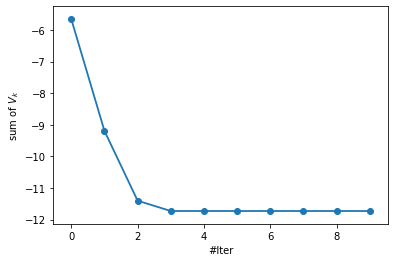

In [42]:
###### plot

v1 = np.array(vl)
x = np.arange(0, 10)
mean_v = np.mean(v1,axis=1) # sum列；得到维度与行维度相同
plt.plot(x, mean_v, linewidth=1.8)
plt.scatter(x, mean_v)
plt.xlabel('#Iter')
plt.ylabel('sum of $V_k$')
plt.show()

In [43]:
policy

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.